In [161]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

# 제주 핫 플레이스 


## 1. 데이터준비

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스 (1).csv


In [3]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [4]:
location_counts =raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [5]:
location_counts.tail()

,place
제주시 화북동,1
"제주아트리움""비밀의그림자""공연",1
한림공원 Hallimpark,1
서귀포의료원,1
한라생태숲,1


In [6]:
location_counts.to_csv('location_counts.csv')

In [7]:
loc_df = pd.read_csv('location_counts.csv')
loc_df.columns = ['지명','빈도']
loc_df.head()

,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59


### 2. 카카오 검색 API를 이용한 장소 검색
- 키워드 장소 검색

In [8]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving kakaoapikey.txt to kakaoapikey (1).txt


'kakaoapikey.txt'

In [9]:
with open(filename) as f:
    api_key = f.read()
len(api_key)

32

In [10]:
import requests
from urllib.parse import quote

In [58]:
keyword = '합정 스타벅스'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
print(url)
# Authorization: KakaoAK {REST_API_KEY}
result = requests.get(url,
            headers={"Authorization": f'KakaoAK {api_key}'}).json()
result

https://dapi.kakao.com/v2/local/search/keyword.json?query=%ED%95%A9%EC%A0%95%20%EC%8A%A4%ED%83%80%EB%B2%85%EC%8A%A4


{'documents': [{'address_name': '서울 마포구 서교동 395-166',
   'category_group_code': 'CE7',
   'category_group_name': '카페',
   'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
   'distance': '',
   'id': '26572121',
   'phone': '1522-3232',
   'place_name': '스타벅스 서교점',
   'place_url': 'http://place.map.kakao.com/26572121',
   'road_address_name': '서울 마포구 양화로 78',
   'x': '126.916980454434',
   'y': '37.5514601750423'},
  {'address_name': '서울 마포구 합정동 472',
   'category_group_code': 'CE7',
   'category_group_name': '카페',
   'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
   'distance': '',
   'id': '2057327896',
   'phone': '1522-3232',
   'place_name': '스타벅스 합정점',
   'place_url': 'http://place.map.kakao.com/2057327896',
   'road_address_name': '서울 마포구 월드컵로1길 14',
   'x': '126.91253700818196',
   'y': '37.54994959743763'},
  {'address_name': '서울 마포구 서교동 490',
   'category_group_code': 'CE7',
   'category_group_name': '카페',
   'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
   'distance': '',
   'id': '288

In [11]:
keyword = '정방폭포'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
print(url)
# Authorization: KakaoAK {REST_API_KEY}
result = requests.get(url,
            headers={"Authorization": f'KakaoAK {api_key}'}).json()
result['documents'][0]

https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%A0%95%EB%B0%A9%ED%8F%AD%ED%8F%AC


{'address_name': '제주특별자치도 서귀포시 동홍동 299-3',
 'category_group_code': '',
 'category_group_name': '',
 'category_name': '여행 > 관광,명소 > 폭포',
 'distance': '',
 'id': '10717401',
 'phone': '064-733-1530',
 'place_name': '정방폭포',
 'place_url': 'http://place.map.kakao.com/10717401',
 'road_address_name': '',
 'x': '126.571605283591',
 'y': '33.2449966137286'}

In [15]:
import numpy as np
import re

In [148]:
# 김재용 원본
def find_place_1(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        #김재용 원본
        name = result['documents'][0]['plcae_name']
        # 리타이핑
        #name = result['documents'][0]['place_name']
        #교수님 name = result['documents'][0]['place_name']
        lng = float(result['documents'][0]['x'])
        lat = float(result['documents'][0]['y'])
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [149]:
find_place_1('구좌지앵')

구좌지앵


('', nan, nan, '구좌지앵')

In [136]:
# 김재용 
def find_place_1(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        name = result['documents'][0]['place_name']
        lng = float(result['documents'][0]['x'])
        lat = float(result['documents'][0]['y'])
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [137]:
find_place_1('구좌지앵')

('구좌지앵', 126.90617413482926, 33.49540702573199, '구좌지앵')

In [12]:
#  교수님

def find_place(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        name = result['documents'][0]['place_name']
        lng = float(result['documents'][0]['x'])
        lat = float(result['documents'][0]['y'])
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [13]:
find_place('구좌지앵')

('구좌지앵', 126.90617413482926, 33.49540702573199, '구좌지앵')

In [90]:
re.sub('[ㄱ-하-ㅣ가-힣0-9 ]', '', '성산일출봉 城山日出峰  Seongsan Ilchulbong') 

'SeongsanIlchulbong'

In [16]:
#loc_df에 공식명칭, 위도, 경도 정보 추가
name_list, lng_list, lat_list = [],[],[]
for place in loc_df.지명:
    place=re.sub('[^가-힣0-9 ]','',place).strip()
    if place:
        name, lng, lat, _ = find_place(place)
    else:
        name, lng, lat = '', np.nan, np.nan
    
    name_list.append(name)
    lng_list.append(lng)
    lat_list.append(lat)

제주고궁한복카페
위미2리 동백군락지
제주 꿈꾸는고래 스쿠버게스트하우스
제주 성산 신산포구자연산횟집 회포장
까사 린다 펜션
아날로그감귤체험
함덕반하다
성산일출봉 게스트하우스 파티 띵까게스트하우스
해발1950 한라산 백록담
스윗슬로
2월22일 브런치카페
쌀다방
윗세오름해발 1700
비브레이브 커피 로스터즈
제스토리 바이제주 제주감성소품
붉은못허브팜   애월본점
제주 조류공원 화조원
애월해안가
빨간모자마법사
제주 서귀포 그릴 데미그라스
모던플레이스 리조트
동탄2에 산다
라비에 와인비스트로
제주초가집 곱들락
유민 아르누보 콜렉션
기원뚝배기
오샹띠
제주도 올레길 6코스 이중섭거리
블랙하우스 떡볶이레스토랑
비양도 해녀촌
키아스마
정방폭포가 보이는 암벽위
성산일출봉 코앞 쉼터
새우조나단
릴리펏 제주점 메종글래드호텔
포근한우리집
섶섬해녀할망카페
더커피브루
테라로사이사랑
선화동1061
제주 반디앤로제이 펜션  플라워브런치카페
카페바띠
군산 정상
미풍해장국  중앙점
유리의성과마법의숲
돈테일러익스프레
몽키비치
한라산 정상 해발 1950
곽지스테이션
유채꽃사진촬영소
카페하도섬엠스테이펜션
하워드존슨 제주 연동 호텔
미미본가
블루밍아일랜드
헤이미쉬제주제주독채펜션
블루마린하우스
중문 마린파크 퍼시픽랜드
해물뚝배기전문 재암식당
평화통일불사리탑사
건축카페  섶섬이보이는
네이처캔바스
빌리엔젤 제주노형점
원더먼트제주
제주도 하늘 위
백리향백반
목포고을 제주도 흑돼지 끝나는 맛
한화아쿠아넷
8월의크리스마스 초원사진관
타시텔레
카페 하도섬
알뜨르프로젝트2018
인공위성 제주
목수금토일
머스태쉬커피머스태쉬하우스
기쁨이네 감자탕
핸드테일러 제주점
카페모리베이커스트리트
오마주마카롱
다만프레르제주신화점
접대  저번에 우리가 만났던 그때
서귀동 2985 세계의 가정식
저녁정원
홍대 깐풍기브라더스
김녕 앞바다
제주카페 스르륵
성산수구레국밥
소자38
미나마라
단디501
여수 앞바다
풍원 한라산볶음밥
청초수물회섭국 신관
제주신화월드 메리어트 리조트관
호끌락80번지
의 한모신의 한모
한복입는 선흘집
몽구네민박
제

In [17]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858


In [101]:
#NUll 데이터 유무 확인
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      197
경도      197
dtype: int64

In [18]:
# NUll 데이터 삭제
total_df = loc_df.dropna() #null 값이 있는 행을 삭제
total_df.isnull().sum().sum()

0

In [19]:
total_df.head()

,지명,빈도,공식명칭,위도,경도
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858
5,제주에인감귤밭,48,제주에인감귤밭,33.256561,126.539014
7,성산일출봉 城山日出峰 Seongsan Ilchulbong,36,성산일출봉,33.459135,126.940538
8,폼포코식당_pompokokitchen,30,폼포코식당,33.450408,126.919065
9,1100고지,25,한라산1100고지,33.358078,126.462220


## 3. 공식명칭으로 데이터 합치기

In [20]:
#공식명칭 중복 여부
total_df.공식명칭.value_counts()[:10]

올레길 7코스(서귀포-월평 올레)    6
함덕해수욕장                4
동문재래시장                4
제주중문관광단지              3
비자림                   3
이호테우해수욕장              3
협재해수욕장                3
우도                    3
세화해변                  3
한라산국립공원               3
Name: 공식명칭, dtype: int64

In [21]:
df = total_df.pivot_table(index=['공식명칭','위도','경도'], values='빈도', aggfunc='sum')
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
40계단,35.103911,129.034571,1
702키친,33.498835,126.534134,1
CU 수원광장점,37.268151,127.000311,1
KT 브로 라페스타점,37.662346,126.767821,1


In [22]:
df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

소노벨 제주      1
엉장매하우스      1
전주횟집        1
제주설심당 본점    1
표선해수욕장      1
Name: 공식명칭, dtype: int64

In [158]:
df.to_csv('공식명칭.csv', index=False)

## 4. folium  지도 시각화
- 1. 개별 표시

In [23]:
df.sort_values(by='빈도', ascending=False).head(10)

,공식명칭,위도,경도,빈도
229,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
539,제주에인감귤밭,33.256561,126.539014,48
318,성산일출봉,33.459135,126.940538,38
663,폼포코식당,33.450408,126.919065,30
690,한라산1100고지,33.358078,126.462220,25
473,위미동백나무군락,33.272939,126.674731,24
471,월정리해수욕장,33.556469,126.795805,22
445,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
29,고집돌우럭 중문점,33.257981,126.416705,21
723,협재해수욕장,33.393866,126.239158,20


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


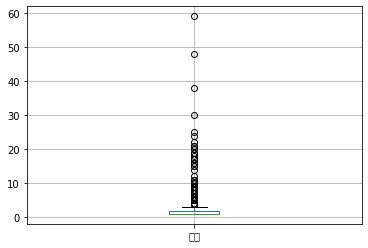

In [24]:
df[['빈도']].boxplot()

In [25]:

import folium

In [26]:
Mt_Hanla = [33.3625, 126.533694]
map = folium.Map(location=Mt_Hanla, zoom_start=11)

for i in df.index:
    folium.CircleMarker(
        radius=int(df.빈도[i]),               # int64는 처리 불가
        location=[df.위도[i], df.경도[i]],    # 위도, 경도
        popup=folium.Popup(df.공식명칭[i], max_width=200),
        tooltip=df.공식명칭[i],
        color='red'
    ).add_to(map)

title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [27]:
map.save('제주도 핫플레이스(개별).html')

In [29]:
from folium.plugins import MarkerCluster

locations, names = [], []
for i in df.index:
    locations.append([df.위도[i], df.경도[i]])
    names.append(df.공식명칭[i])

In [30]:
map = folium.Map(location=Mt_Hanla, zoom_start=11)
MarkerCluster(
    locations=locations, popups=names,
    name='제주', overlay=True, control=True
).add_to(map)
title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [31]:
map.save('제주도 핫플레이스(그룹).html')